In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
# Load pre-trained VGG16 model
import os
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

# model = VGG16(weights='imagenet', include_top=False)
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

# Function to extract features from an image
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

574710816/574710816 [==============================] - 5s 0us/step


In [ ]:
import os

path = r"/content/drive/MyDrive/original/dataset"

# Change the working directory to the path where the images are located
os.chdir(path)

# This list holds all the image filenames
images = []

# Creates a ScandirIterator aliased as files
with os.scandir(path) as files:
    # Loops through each file in the directory
    for file in files:
        # Appends only the image files to the images list
        # if file.name.endswith('.jpg'):
            images.append(file.name)

# Print the list of image filenames
print(images)


['subject02.normal', 'subject02.rightlight', 'subject04.sleepy', 'subject04.centerlight', 'subject01.normal', 'subject03.normal', 'subject02.surprised', 'subject03.glasses', 'subject03.leftlight', 'subject01.sad', 'subject05.centerlight', 'subject02.centerlight', 'subject02.wink', 'subject01.noglasses', 'subject03.surprised', 'subject01.wink', 'subject04.leftlight', 'subject05.glasses', 'subject02.leftlight', 'subject01.surprised', 'subject01.sleepy', 'subject01.glasses', 'subject01.rightlight', 'subject04.happy', 'subject02.happy', 'subject01.happy', 'subject02.sleepy', 'subject01.centerlight', 'subject04.normal', 'subject03.wink', 'subject05.happy', 'subject03.centerlight', 'subject02.glasses', 'subject03.happy', 'subject02.noglasses', 'subject03.rightlight', 'subject05.leftlight', 'subject01.leftlight', 'subject04.wink', 'subject04.sad', 'subject04.noglasses', 'subject03.sad', 'subject03.noglasses', 'subject02.sad', 'subject04.glasses', 'subject04.surprised', 'subject04.rightlight',

In [ ]:
# List to store features and labels
features_list = []

# Iterate over each image filename
for filename in images:
    print('*'*10, filename)
    # Extract features
    if filename != 'cluster_output2':
        if filename != '.ipynb_checkpoints':
            features = extract_features(os.path.join(path, filename))
            # Append features to the list
            features_list.append(features)

# Convert the features list to a numpy array
X = np.array(features_list)

********** subject02.normal
1/1 [==============================] - 1s 1s/step
********** subject02.rightlight
1/1 [==============================] - 1s 865ms/step
********** subject04.sleepy
1/1 [==============================] - 1s 632ms/step
********** subject04.centerlight
1/1 [==============================] - 1s 537ms/step
********** subject01.normal
1/1 [==============================] - 1s 550ms/step
********** subject03.normal
1/1 [==============================] - 1s 543ms/step
********** subject02.surprised
1/1 [==============================] - 1s 547ms/step
********** subject03.glasses
1/1 [==============================] - 1s 543ms/step
********** subject03.leftlight
1/1 [==============================] - 1s 548ms/step
********** subject01.sad
1/1 [==============================] - 1s 553ms/step
********** subject05.centerlight
1/1 [==============================] - 1s 531ms/step
********** subject02.centerlight
1/1 [==============================] - 1s 558ms/step
********

In [ ]:

import shutil

# Perform DBSCAN clustering
eps = 300 # Adjust as needed
min_samples = 1  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)

# Define the output directory
output_dir = "/content/drive/MyDrive/New folder/cluster_output23"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Move images to cluster-specific folders
for cluster_label in np.unique(cluster_labels):
    cluster_dir = os.path.join(output_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    for filename, label in zip(images, cluster_labels):
        if label == cluster_label:
            shutil.copy(os.path.join(path, filename), cluster_dir)

# # Compute silhouette score
# silhouette_avg = silhouette_score(X, cluster_labels)
# print("Silhouette Score:", silhouette_avg)

# # Visualize Clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
# plt.title('DBSCAN Clustering of Images')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.colorbar(label='Cluster')
# plt.show()


In [ ]:


# Perform DBSCAN clustering
eps = 0.5  # Adjust as needed
min_samples =   # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)

# Define the output directory
output_dir = "/content/drive/MyDrive/New folder/cluster_output2"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Move images to cluster-specific folders
for cluster_label in np.unique(cluster_labels):
    cluster_dir = os.path.join(output_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    for filename, label in zip(images, cluster_labels):
        if label == cluster_label:
            shutil.copy(os.path.join(path, filename), cluster_dir)

# # Compute silhouette score
# silhouette_avg = silhouette_score(X, cluster_labels)
# print("Silhouette Score:", silhouette_avg)

# # Visualize Clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
# plt.title('DBSCAN Clustering of Images')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.colorbar(label='Cluster')
# plt.show()


**Resnet
**

In [ ]:
import os

path = r"/content/drive/MyDrive/original/dataset"

# Change the working directory to the path where the images are located
os.chdir(path)

# This list holds all the image filenames
images = []

# Creates a ScandirIterator aliased as files
with os.scandir(path) as files:
    # Loops through each file in the directory
    for file in files:
        # Appends only the image files to the images list
        # if file.name.endswith('.jpg'):
            images.append(file.name)

# Print the list of image filenames
print(images)


['subject02.normal', 'subject02.rightlight', 'subject04.sleepy', 'subject04.centerlight', 'subject01.normal', 'subject03.normal', 'subject02.surprised', 'subject03.glasses', 'subject03.leftlight', 'subject01.sad', 'subject05.centerlight', 'subject02.centerlight', 'subject02.wink', 'subject01.noglasses', 'subject03.surprised', 'subject01.wink', 'subject04.leftlight', 'subject05.glasses', 'subject02.leftlight', 'subject01.surprised', 'subject01.sleepy', 'subject01.glasses', 'subject01.rightlight', 'subject04.happy', 'subject02.happy', 'subject01.happy', 'subject02.sleepy', 'subject01.centerlight', 'subject04.normal', 'subject03.wink', 'subject05.happy', 'subject03.centerlight', 'subject02.glasses', 'subject03.happy', 'subject02.noglasses', 'subject03.rightlight', 'subject05.leftlight', 'subject01.leftlight', 'subject04.wink', 'subject04.sad', 'subject04.noglasses', 'subject03.sad', 'subject03.noglasses', 'subject02.sad', 'subject04.glasses', 'subject04.surprised', 'subject04.rightlight',

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to extract features from an image and store them in a file
def extract_features_and_save(image_path, output_file):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    np.save(output_file, features)

# Path to the directory containing the images
image_dir = "/content/drive/MyDrive/dataset"

# Path to the directory where you want to save the features
output_dir = "/content/drive/MyDrive/features"
os.makedirs(output_dir, exist_ok=True)

# Iterate over each image filename
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        # Construct the full path to the image
        image_path = os.path.join(image_dir, filename)
        # Construct the output file path
        output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.npy")
        # Extract features and save them to the output file
        extract_features_and_save(image_path, output_file)

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        # Construct the full path to the image
        image_path = os.path.join(image_dir, filename)
        # Construct the output file path
        output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.npy")
        # Extract features and save them to the output file
        extract_features_and_save(image_path, output_file)


1/1 [==============================] - 0s 236ms/step


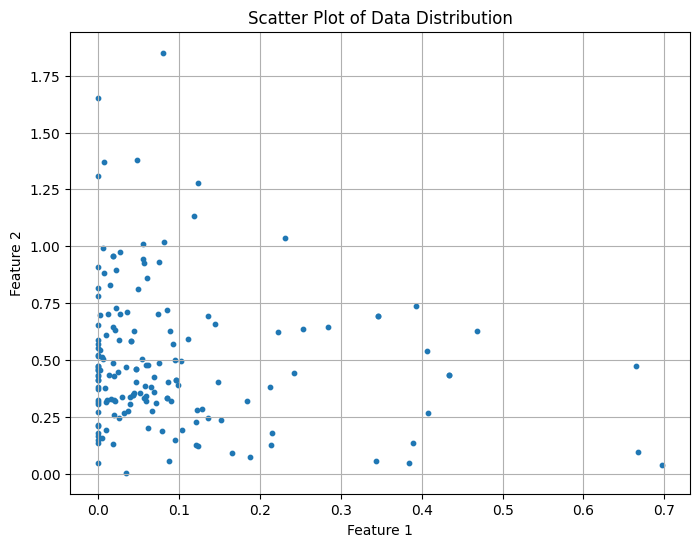

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X is your feature matrix with shape (n_samples, n_features)
# You may need to extract features or preprocess the data before visualization

# Plot a scatter plot of the first two features
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10)  # Adjust marker size as needed
plt.title("Scatter Plot of Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [ ]:


# Load the saved features
features_list = []
for filename in os.listdir(output_dir):
    if filename.endswith(".npy"):
        features = np.load(os.path.join(output_dir, filename))
        features_list.append(features)
X = np.array(features_list)

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

# Perform DBSCAN clustering
eps = 11 # Adjust as needed
min_samples = 2 # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)


# Create a directory to store cluster outputs
cluster_output_dir = "/content/drive/MyDrive/resnet_output/24"
os.makedirs(cluster_output_dir, exist_ok=True)

# Move images to cluster-specific folders
for i, cluster_label in enumerate(cluster_labels):
    cluster_dir = os.path.join(cluster_output_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    filename = os.listdir(image_dir)[i]
    shutil.copy(os.path.join(image_dir, filename), cluster_dir)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)



Silhouette Score: 0.15653431


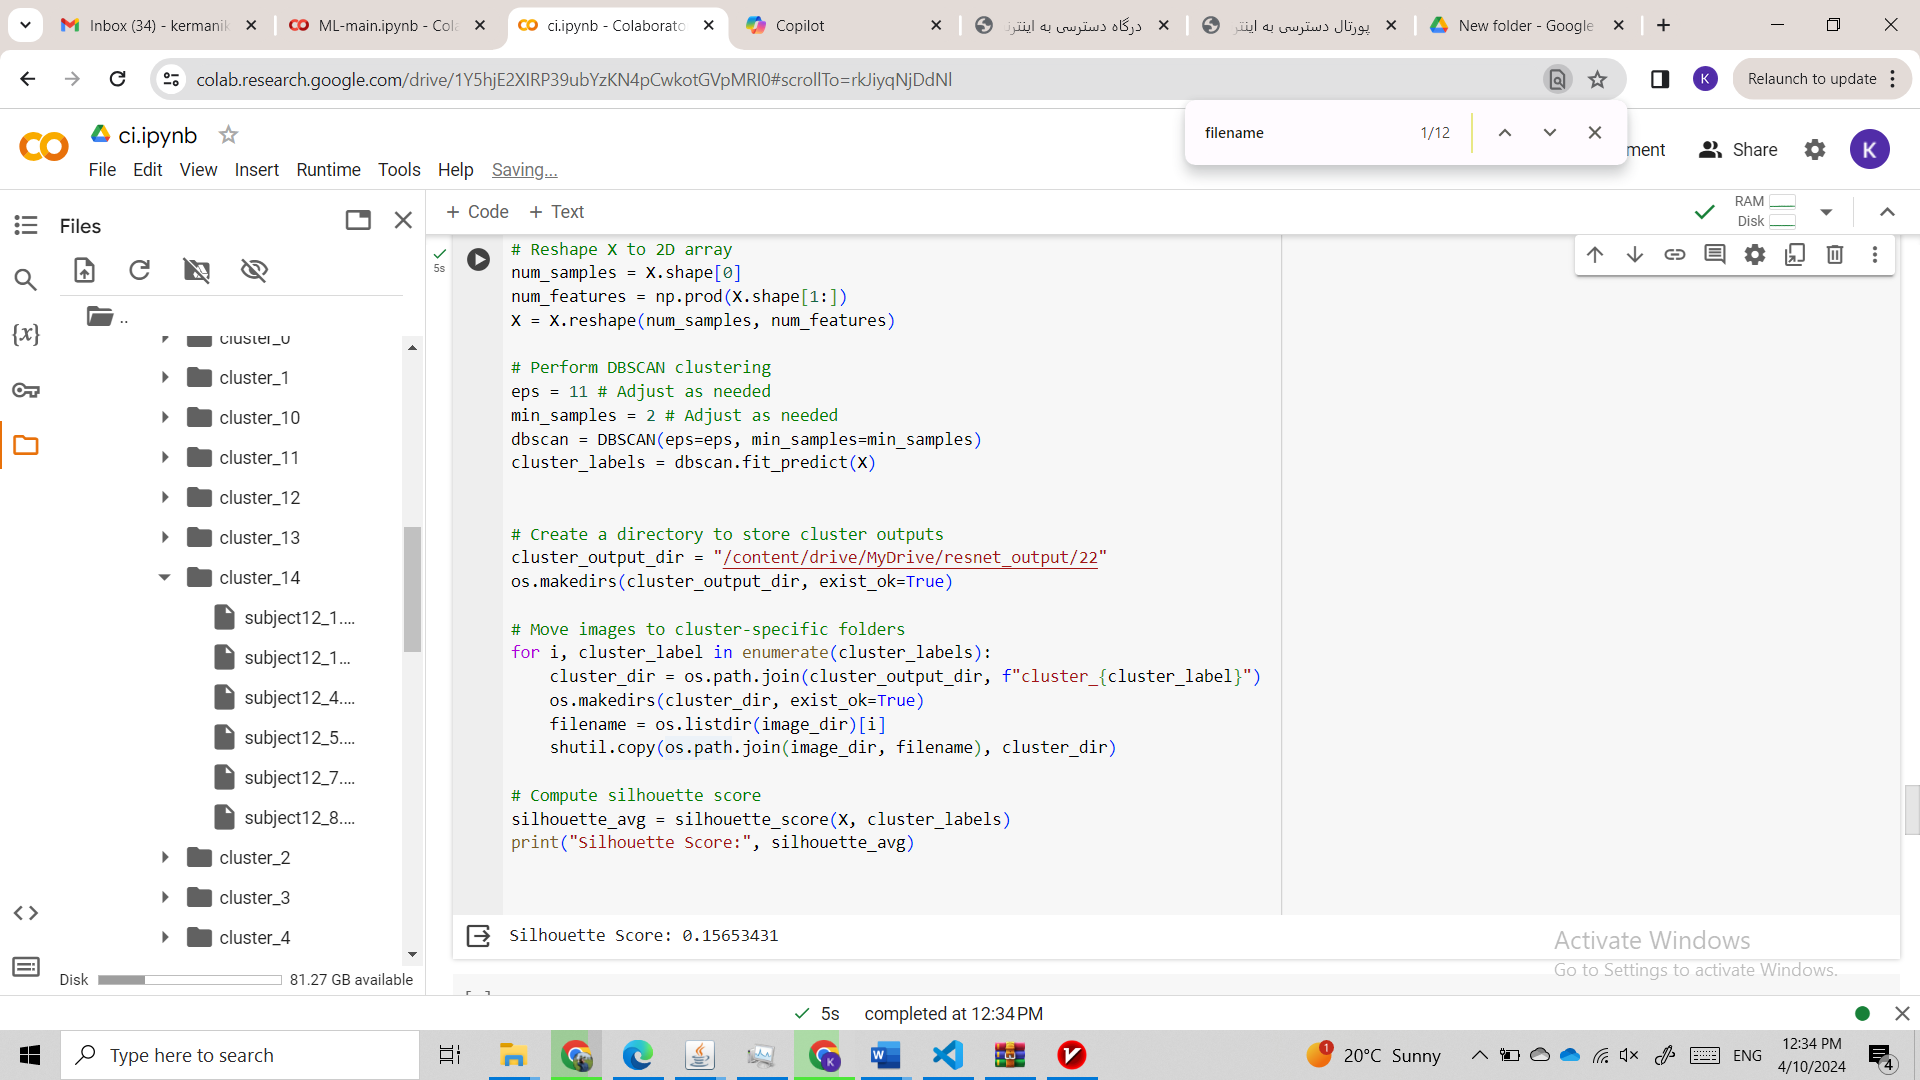

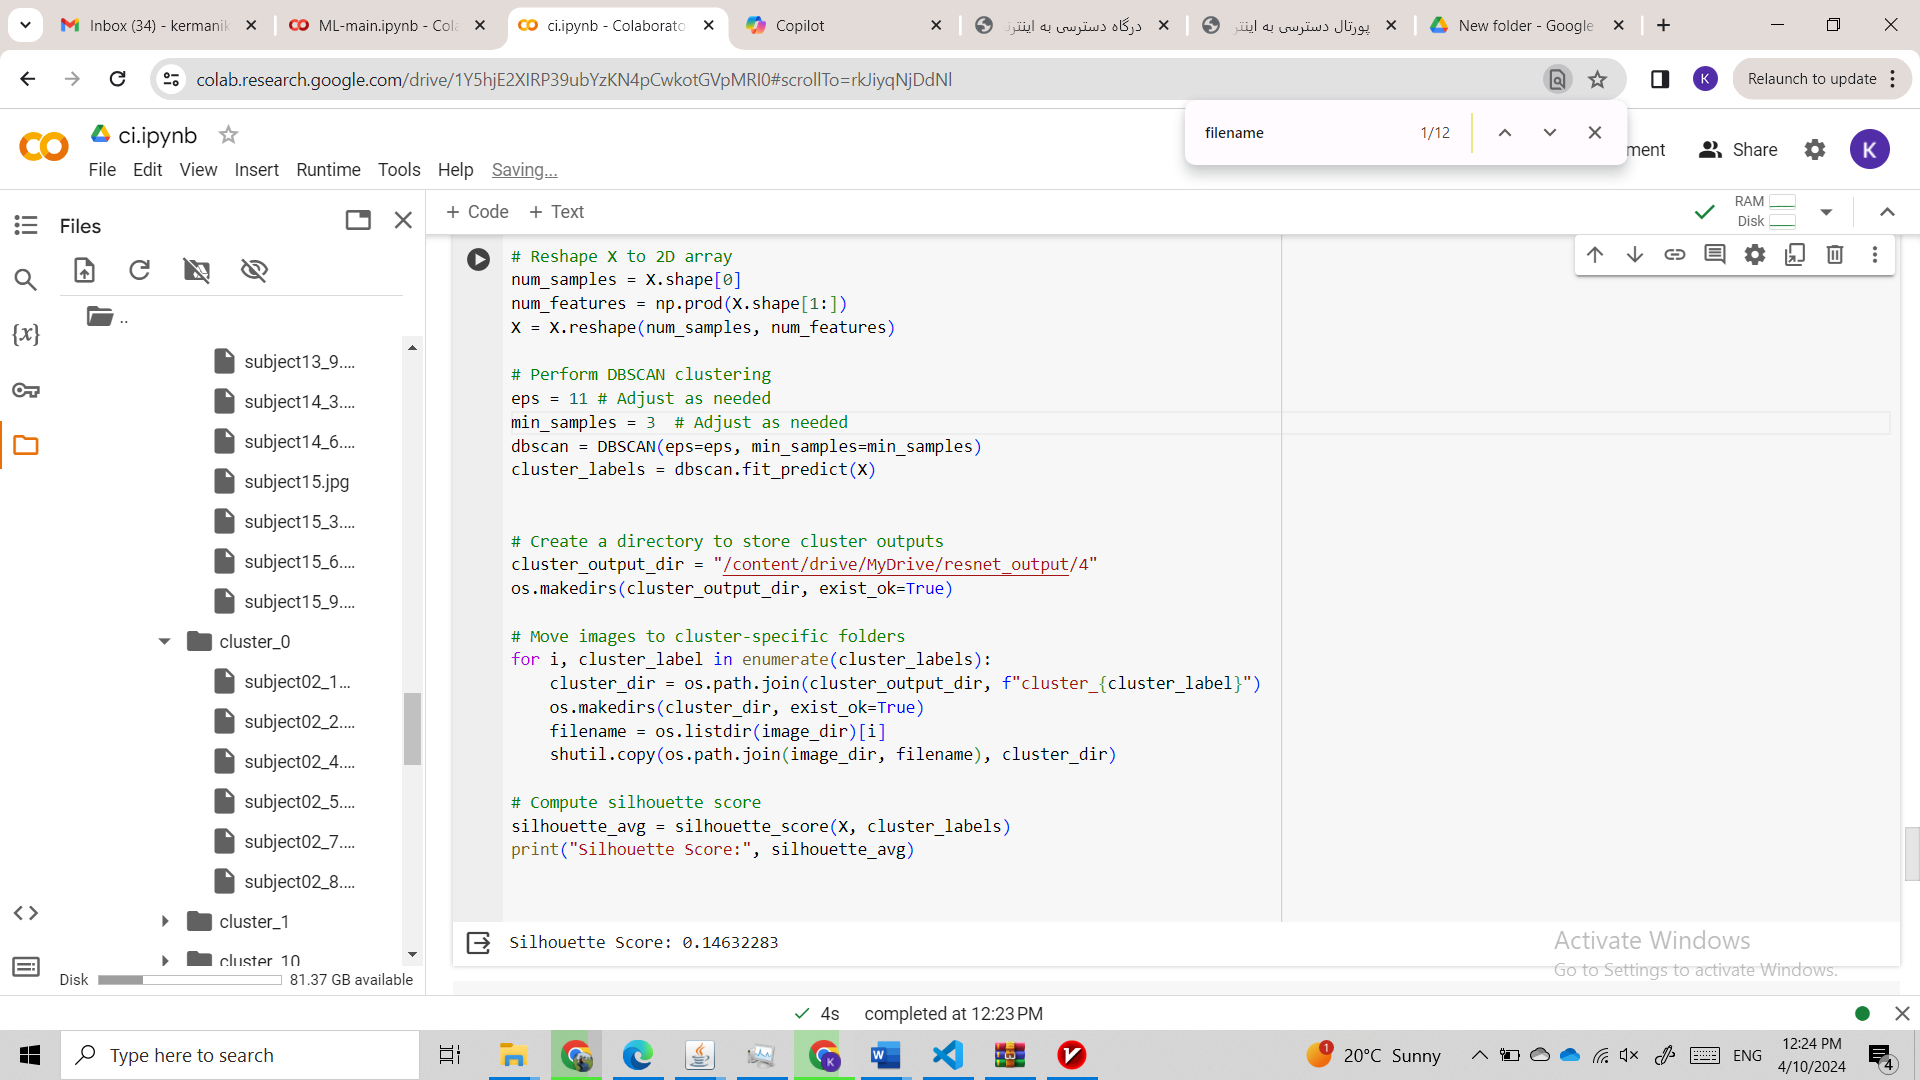

In [ ]:
output_dir = "/content/drive/MyDrive/features"

# Load the saved features
features_list = []
for filename in os.listdir(output_dir):
    if filename.endswith(".npy"):
        features = np.load(os.path.join(output_dir, filename))
        features_list.append(features)
X = np.array(features_list)

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)
# Perform DBSCAN clustering with different parameters
eps_values = np.linspace(8, 14, num=20)  # Adjust as needed
min_samples_values = [3]  # Adjust as needed
best_silhouette_score = -1
best_eps = None
best_min_samples = None
best_cluster_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples
            best_cluster_labels = cluster_labels

print("Best Silhouette Score:", best_silhouette_score)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)


Best Silhouette Score: 0.14460751
Best eps: 10.842105263157894
Best min_samples: 3


In [ ]:
import numpy as np
import os
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the saved features
features_list = []
for filename in os.listdir(output_dir):
    if filename.endswith(".npy"):
        features = np.load(os.path.join(output_dir, filename))
        features_list.append(features)
X = np.array(features_list)

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

# Perform DBSCAN clustering with different parameters
eps_values = np.linspace(8, 14, num=20)  # Adjust as needed
min_samples_values = [3, 4, 5, 6]  # Adjust as needed
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = (eps, min_samples)

print("Best Silhouette Score:", best_score)
print("Best parameters (eps, min_samples):", best_params)


Best Silhouette Score: 0.16009481
Best parameters (eps, min_samples): (11.473684210526315, 6)


Silhouette Score: 0.14460751


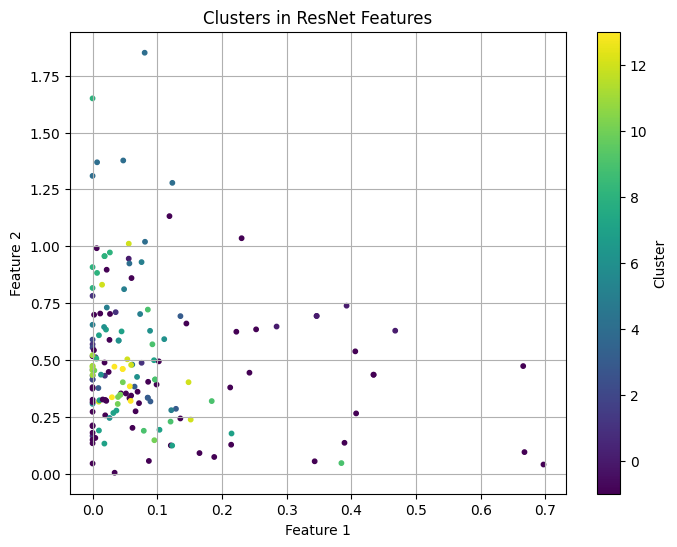

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import shutil

output_dir = "/content/drive/MyDrive/features"

features_list = []
for filename in os.listdir(output_dir):
    if filename.endswith(".npy"):
        features = np.load(os.path.join(output_dir, filename))
        features_list.append(features)
X = np.array(features_list)

# Perform DBSCAN clustering
eps = 10.84  # Adjust as needed
min_samples = 3  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)

# Create a directory to store cluster outputs
cluster_output_dir = "/content/drive/MyDrive/resnet_output/11_clusters"
os.makedirs(cluster_output_dir, exist_ok=True)

# Move images to cluster-specific folders
image_dir = "/content/drive/MyDrive/dataset"
for i, cluster_label in enumerate(cluster_labels):
    cluster_dir = os.path.join(cluster_output_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    filename = os.listdir(image_dir)[i]
    shutil.copy(os.path.join(image_dir, filename), cluster_dir)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("Clusters in ResNet Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


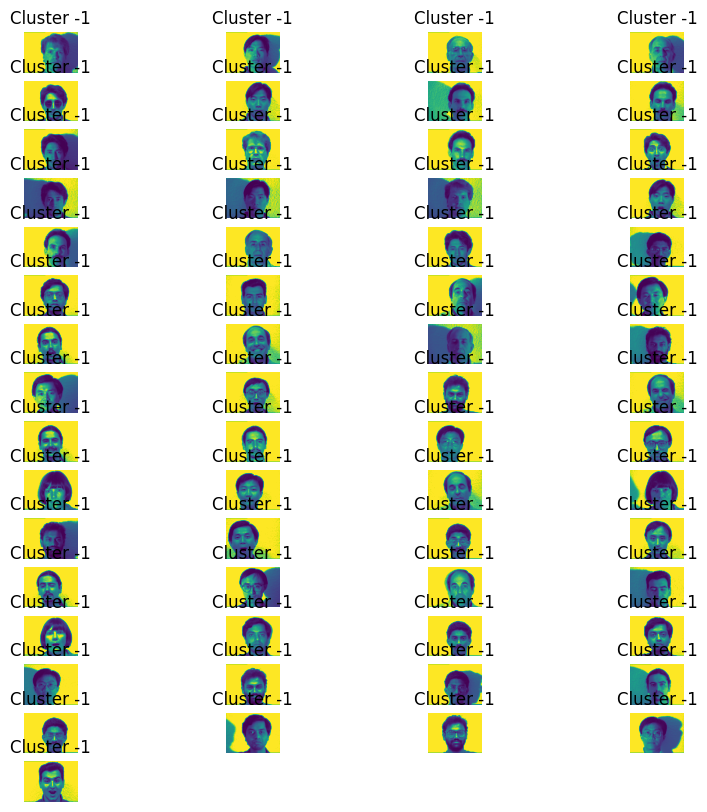

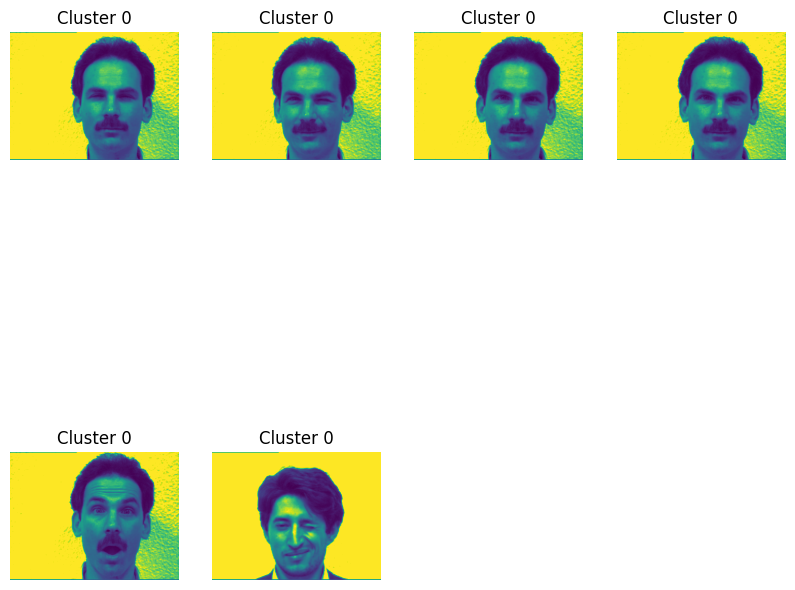

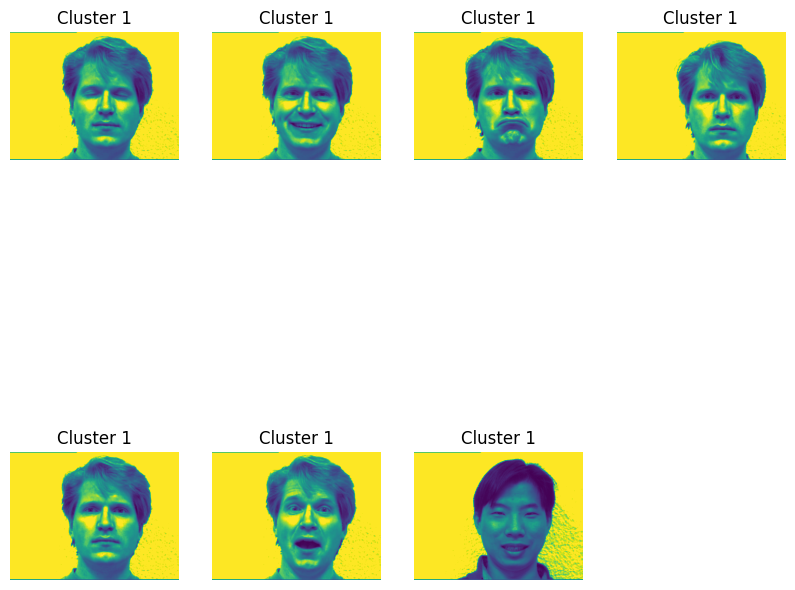

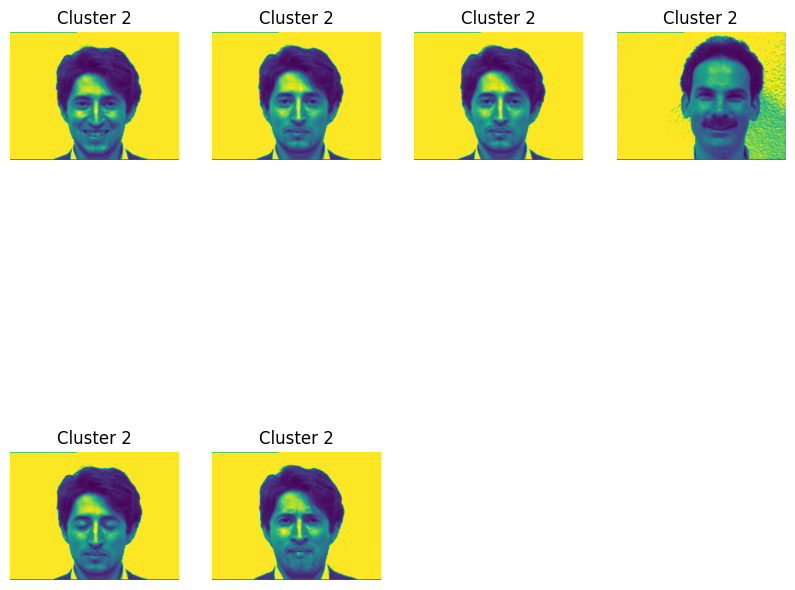

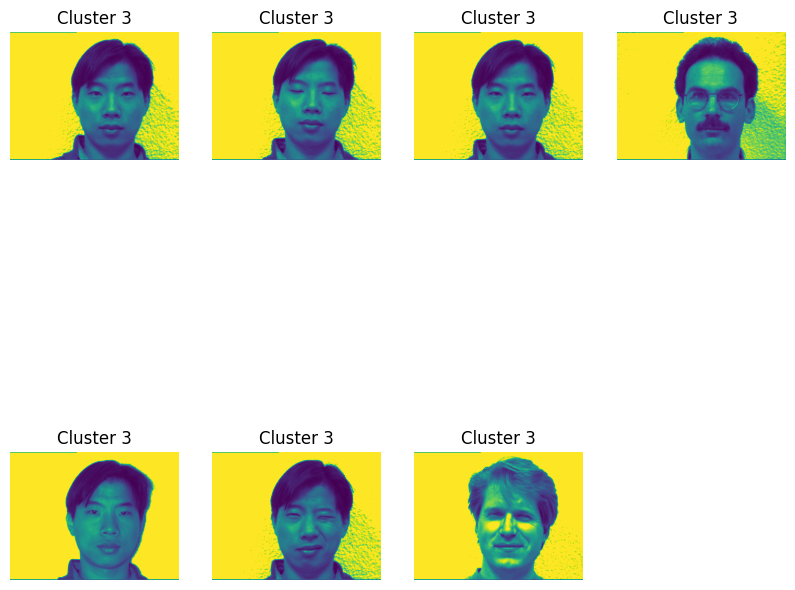

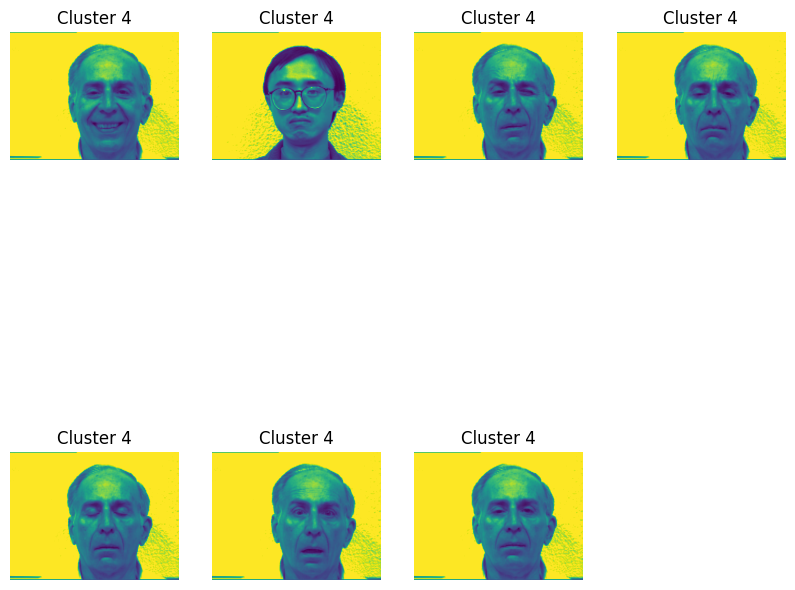

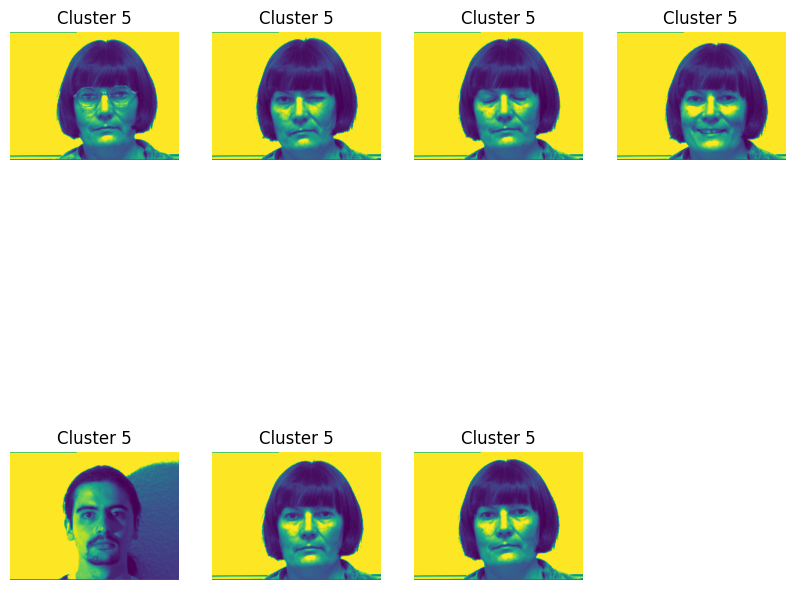

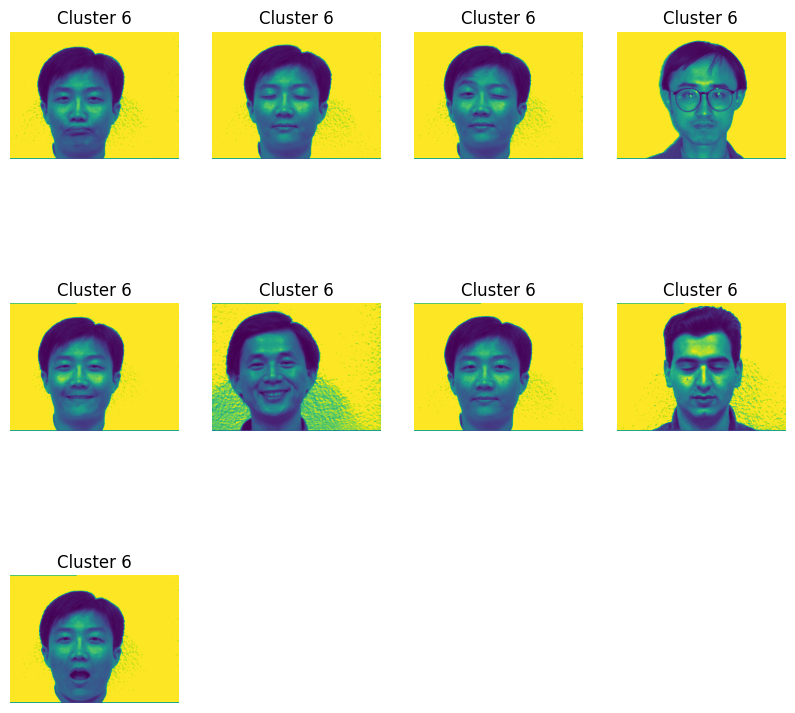

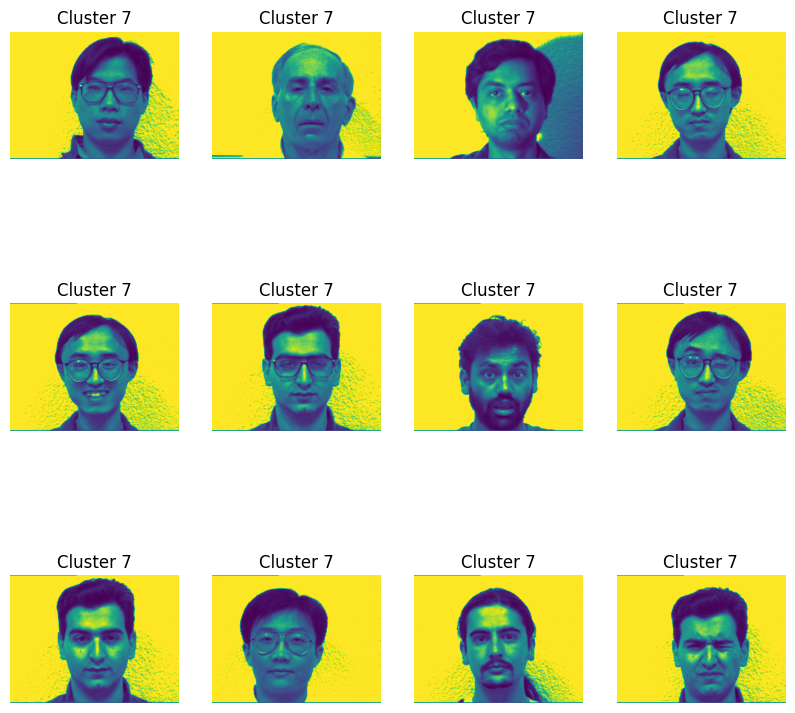

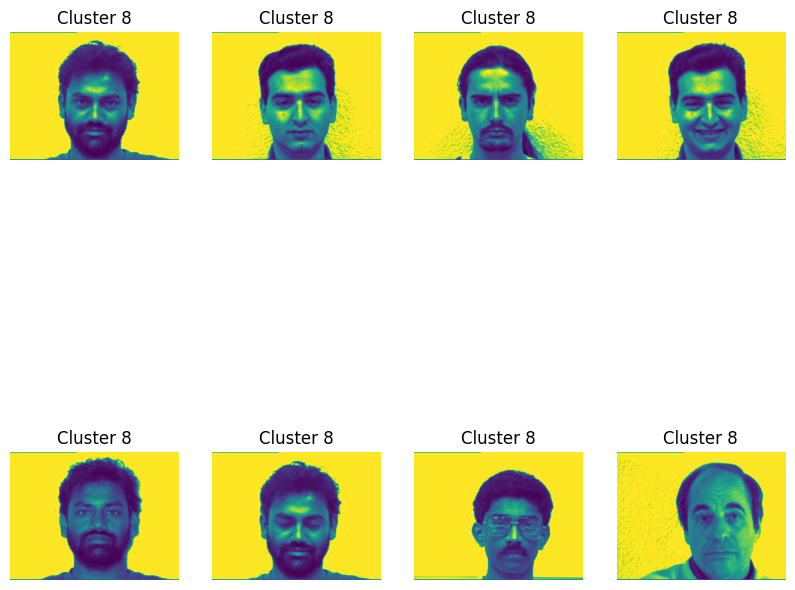

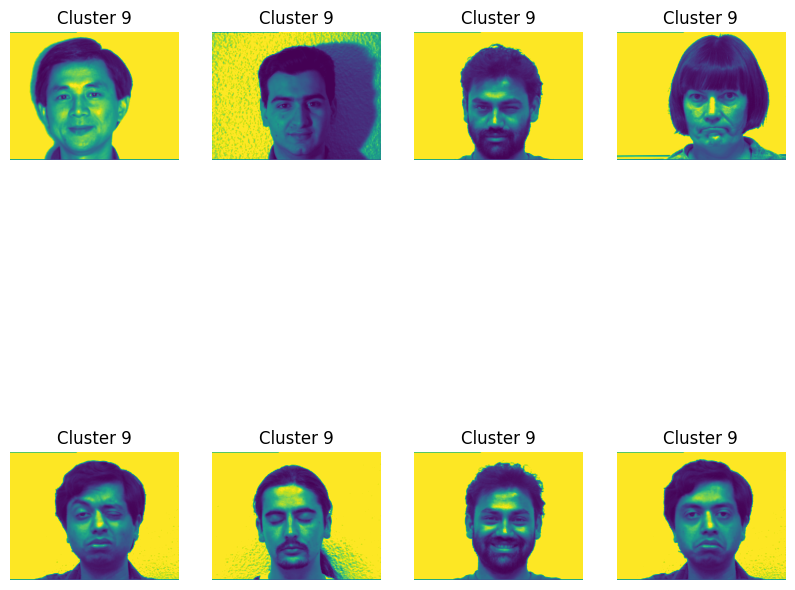

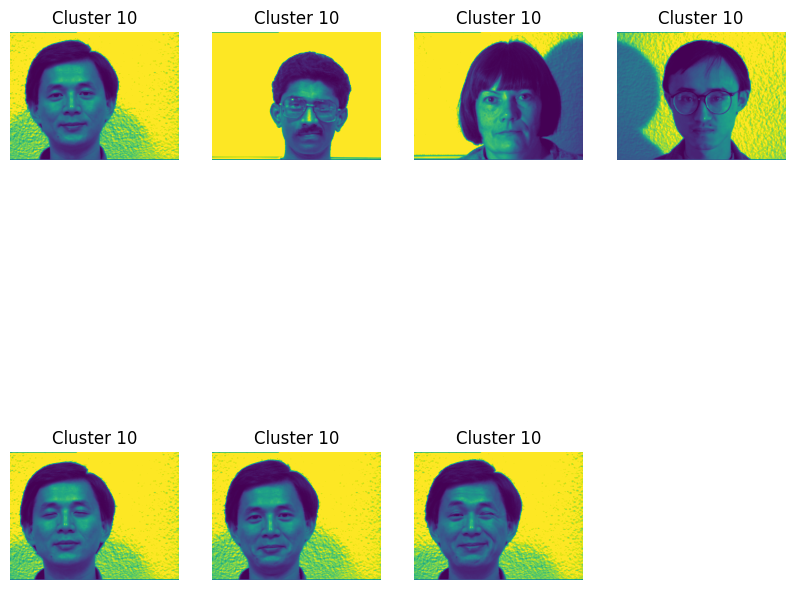

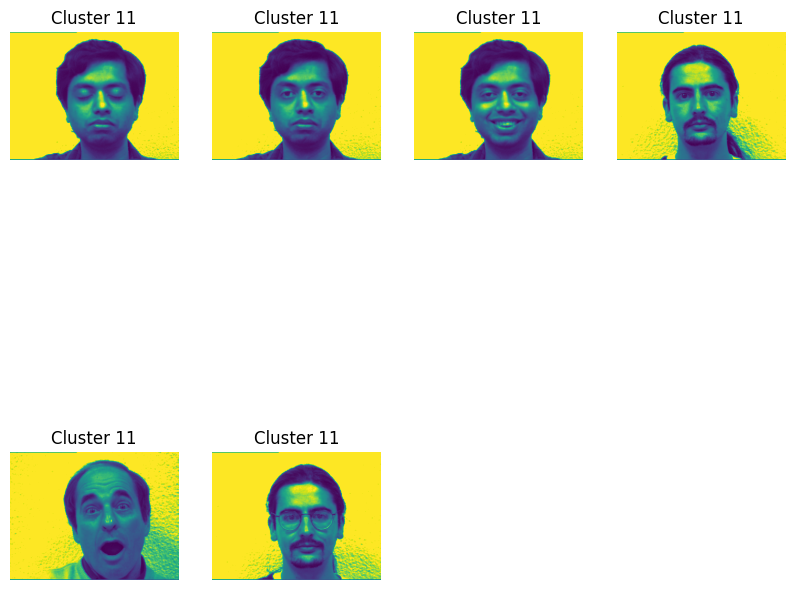

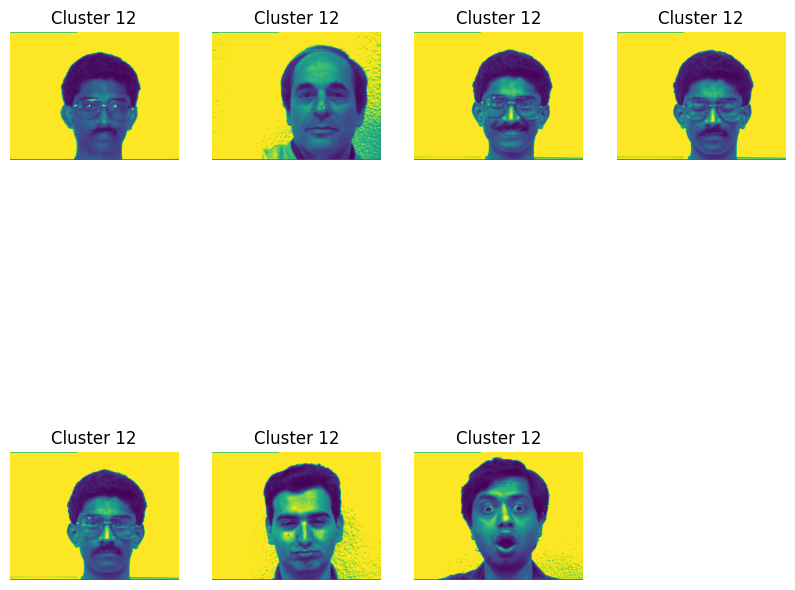

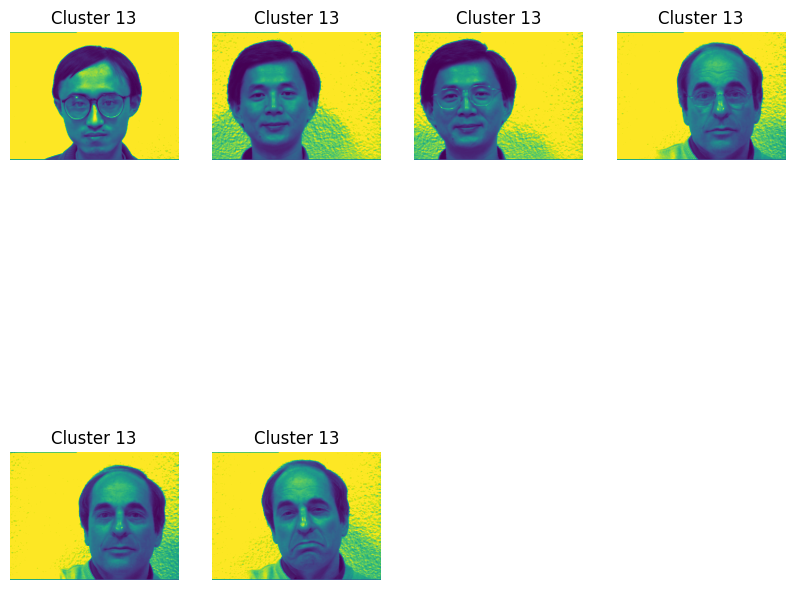

In [ ]:
import os
import shutil
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from PIL import Image
import math


# Create a directory to store cluster outputs
cluster_output_dir = "/content/drive/MyDrive/resnet_output/11"
os.makedirs(cluster_output_dir, exist_ok=True)

# Visualize the images in each cluster
for cluster_label in np.unique(cluster_labels):
    cluster_dir = os.path.join(cluster_output_dir, f"cluster_{cluster_label}")
    cluster_images = [Image.open(os.path.join(cluster_dir, img)) for img in os.listdir(cluster_dir)]
    # Display images in a grid
    plt.figure(figsize=(10, 10))
    num_images = len(cluster_images)
    columns = 4
    rows = math.ceil(num_images / columns)  # Ensure rows is a positive integer
    for i, image in enumerate(cluster_images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f'Cluster {cluster_label}')
    plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("Clusters in ResNet Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 800x600 with 0 Axes>

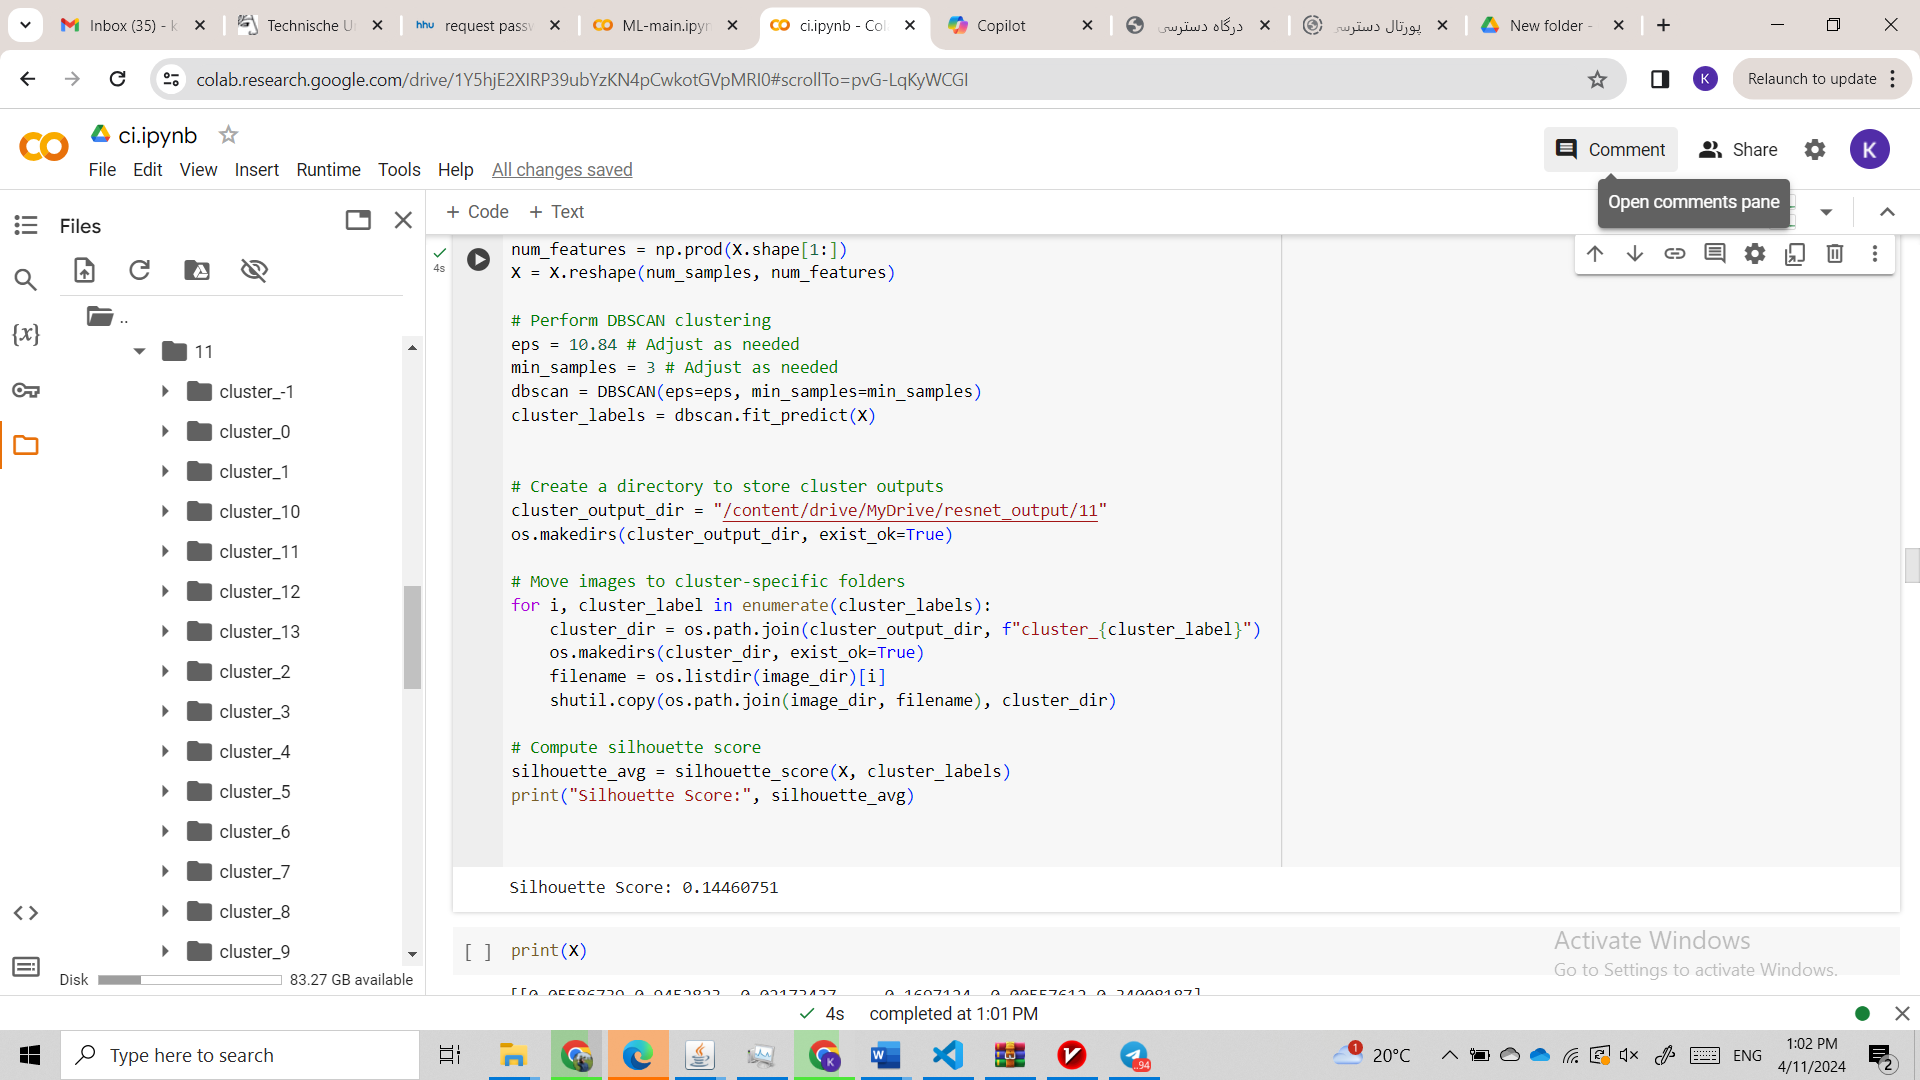

In [ ]:
print(X)

[[0.05586739 0.9452823  0.02173437 ... 0.1697124  0.00557612 0.34008187]
 [0.01901576 0.4303333  0.02832339 ... 0.         0.         0.51961386]
 [0.05699953 0.3314199  0.         ... 0.14416967 0.         0.32199663]
 ...
 [0.         0.5207142  0.02226548 ... 0.         0.0135145  0.12988305]
 [0.3432484  0.05375258 0.15460773 ... 0.         0.         0.51329666]
 [0.12302259 0.12285159 0.05229859 ... 0.0018456  0.         0.13666274]]


In [ ]:
import os
import itertools
from collections import Counter

def extract_subject_number(image_name):
    return image_name.split('_')[0][-2:]

def rand_index_with_subjects(true_labels_dir, predicted_labels_dir):
    true_labels = []
    predicted_labels = []

    # Extract true labels from directory names
    for folder in os.listdir(true_labels_dir):
        if folder.startswith("cluster_"):
            true_labels.extend([folder] * len(os.listdir(os.path.join(true_labels_dir, folder))))

    # Extract predicted labels from subdirectories
    for predicted_folder in os.listdir(predicted_labels_dir):
        predicted_folder_path = os.path.join(predicted_labels_dir, predicted_folder)
        if os.path.isdir(predicted_folder_path):
            predicted_labels.extend([predicted_folder] * len(os.listdir(predicted_folder_path)))
            # Check if all images in the predicted folder belong to the same subject
            subjects = []
            for image_file in os.listdir(predicted_folder_path):
                subject = extract_subject_number(image_file)
                subjects.append(subject)

            # Find the most repeated subject
            most_common_subject = Counter(subjects).most_common(1)[0][0]

            # Calculate the number of agreements and disagreements
            agree_pairs = 0
            disagree_pairs = 0
            for pair in itertools.combinations(range(len(true_labels)), 2):
                if pair[0] >= len(subjects) or pair[1] >= len(subjects):
                    print(f"Warning: Not enough images in folder {predicted_folder} to calculate Rand Index")
                    break
                true_subject1 = extract_subject_number(os.listdir(os.path.join(true_labels_dir, true_labels[pair[0]]))[0])
                true_subject2 = extract_subject_number(os.listdir(os.path.join(true_labels_dir, true_labels[pair[1]]))[0])
                predicted_subject1 = extract_subject_number(subjects[pair[0]])
                predicted_subject2 = extract_subject_number(subjects[pair[1]])

                if true_subject1 == true_subject2:
                    true_same_subject = True
                else:
                    true_same_subject = False

                if predicted_subject1 == predicted_subject2:
                    predicted_same_subject = True
                else:
                    predicted_same_subject = False

                if true_same_subject == predicted_same_subject:
                    agree_pairs += 1
                else:
                    disagree_pairs += 1

            # Calculate Rand Index
            if agree_pairs + disagree_pairs == 0:
                rand_index = 0
            else:
                rand_index = agree_pairs / (agree_pairs + disagree_pairs)

            print(f"Rand Index for {predicted_folder}: {rand_index}")

# Example usage:
true_labels_dir = "/content/drive/MyDrive/dataset"
predicted_labels_dir = "/content/drive/MyDrive/resnet_output/24"
ri = rand_index_with_subjects(true_labels_dir, predicted_labels_dir)


Rand Index for cluster_0: 0.19047619047619047
Rand Index for cluster_1: 0.37142857142857144
Rand Index for cluster_-1: 0.047619047619047616
Rand Index for cluster_2: 0.3333333333333333
Rand Index for cluster_3: 0.1
Rand Index for cluster_4: 0.24761904761904763
Rand Index for cluster_5: 0.3523809523809524
Rand Index for cluster_6: 0.4095238095238095
Rand Index for cluster_7: 0.37142857142857144
Rand Index for cluster_8: 0.3142857142857143
Rand Index for cluster_9: 0.26666666666666666
Rand Index for cluster_10: 0.125
Rand Index for cluster_11: 0.45454545454545453
Rand Index for cluster_12: 0.125
Rand Index for cluster_13: 1.0
Rand Index for cluster_14: 1.0
Rand Index for cluster_15: 1.0
Rand Index for cluster_16: 1.0
Rand Index for cluster_17: 1.0
Rand Index for cluster_18: 1.0


In [ ]:
import os
import itertools
from collections import Counter

def extract_subject_number(image_name):
    return image_name.split('_')[0][-2:]

def rand_index_with_subjects(true_labels_dir, predicted_labels_dir):
    true_labels = []
    predicted_labels = []
    total_agree_pairs = 0
    total_disagree_pairs = 0
    total_pairs = 0

    # Extract true labels from directory names
    for folder in os.listdir(true_labels_dir):
        if folder.startswith("cluster_"):
            true_labels.extend([folder] * len(os.listdir(os.path.join(true_labels_dir, folder))))

    # Extract predicted labels from subdirectories
    for predicted_folder in os.listdir(predicted_labels_dir):
        predicted_folder_path = os.path.join(predicted_labels_dir, predicted_folder)
        if os.path.isdir(predicted_folder_path):
            predicted_labels.extend([predicted_folder] * len(os.listdir(predicted_folder_path)))
            # Check if all images in the predicted folder belong to the same subject
            subjects = []
            for image_file in os.listdir(predicted_folder_path):
                subject = extract_subject_number(image_file)
                subjects.append(subject)

            # Find the most repeated subject
            most_common_subject = Counter(subjects).most_common(1)[0][0]

            # Calculate the number of agreements and disagreements
            agree_pairs = 0
            disagree_pairs = 0
            for pair in itertools.combinations(range(len(true_labels)), 2):
                if pair[0] >= len(subjects) or pair[1] >= len(subjects):
                    print(f"Warning: Not enough images in folder {predicted_folder} to calculate Rand Index")
                    break
                true_subject1 = extract_subject_number(os.listdir(os.path.join(true_labels_dir, true_labels[pair[0]]))[0])
                true_subject2 = extract_subject_number(os.listdir(os.path.join(true_labels_dir, true_labels[pair[1]]))[0])
                predicted_subject1 = extract_subject_number(subjects[pair[0]])
                predicted_subject2 = extract_subject_number(subjects[pair[1]])

                if true_subject1 == true_subject2:
                    true_same_subject = True
                else:
                    true_same_subject = False

                if predicted_subject1 == predicted_subject2:
                    predicted_same_subject = True
                else:
                    predicted_same_subject = False

                if true_same_subject == predicted_same_subject:
                    agree_pairs += 1
                else:
                    disagree_pairs += 1

            # Add the number of pairs to the total count
            total_agree_pairs += agree_pairs
            total_disagree_pairs += disagree_pairs
            total_pairs += len(list(itertools.combinations(range(len(true_labels)), 2)))

            # Calculate Rand Index for the current cluster
            if agree_pairs + disagree_pairs == 0:
                rand_index = 0
            else:
                rand_index = agree_pairs / (agree_pairs + disagree_pairs)

            print(f"Rand Index for {predicted_folder}: {rand_index}")

    # Calculate the overall Rand Index
    overall_rand_index = total_agree_pairs / (total_agree_pairs + total_disagree_pairs)
    print(f"Overall Rand Index for all clusters: {overall_rand_index}")

# Example usage:
true_labels_dir = "/content/drive/MyDrive/dataset"
predicted_labels_dir = "/content/drive/MyDrive/resnet_output/24"
ri = rand_index_with_subjects(true_labels_dir, predicted_labels_dir)


Rand Index for cluster_0: 0.19047619047619047
Rand Index for cluster_1: 0.37142857142857144
Rand Index for cluster_-1: 0.047619047619047616
Rand Index for cluster_2: 0.3333333333333333
Rand Index for cluster_3: 0.1
Rand Index for cluster_4: 0.24761904761904763
Rand Index for cluster_5: 0.3523809523809524
Rand Index for cluster_6: 0.4095238095238095
Rand Index for cluster_7: 0.37142857142857144
Rand Index for cluster_8: 0.3142857142857143
Rand Index for cluster_9: 0.26666666666666666
Rand Index for cluster_10: 0.125
Rand Index for cluster_11: 0.45454545454545453
Rand Index for cluster_12: 0.125
Rand Index for cluster_13: 1.0
Rand Index for cluster_14: 1.0
Rand Index for cluster_15: 1.0
Rand Index for cluster_16: 1.0
Rand Index for cluster_17: 1.0
Rand Index for cluster_18: 1.0
Overall Rand Index for all clusters: 0.2970027247956403


***agglomarative***

assume we know how many clusters we want

In [ ]:
from sklearn.cluster import AgglomerativeClustering

features_list = []
for filename in os.listdir(output_dir):
    if filename.endswith(".npy"):
        features = np.load(os.path.join(output_dir, filename))
        features_list.append(features)
X = np.array(features_list)

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

n_clusters = 15  # Adjust as needed
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agglomerative.fit_predict(X)

# Create a directory to store cluster outputs
output_dir = os.path.join(image_dir, "cluster_output_agglomerative")
os.makedirs(output_dir, exist_ok=True)

# Move images to cluster-specific folders
for cluster_label in np.unique(cluster_labels):
    cluster_dir = os.path.join(output_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    for filename, label in zip(labels_list, cluster_labels):
        if label == cluster_label:
            shutil.copy(os.path.join(image_dir, filename), cluster_dir)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.199161


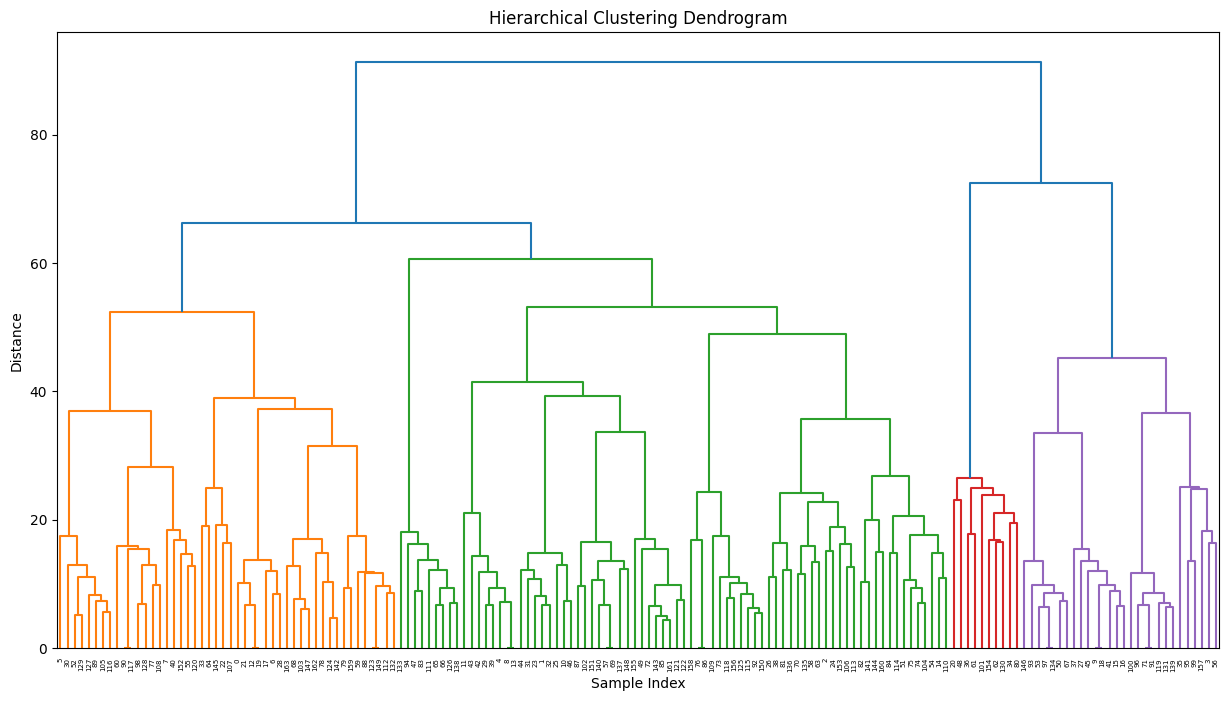

In [ ]:
import os
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import shutil

# Path to the directory containing the saved features
output_dir = "/content/drive/MyDrive/features"

# This list holds all the feature filenames
feature_files = []

# Creates a ScandirIterator aliased as files
with os.scandir(output_dir) as files:
    # Loops through each file in the directory
    for file in files:
        # Appends only the feature files to the list
        if file.name.endswith('.npy'):
            feature_files.append(file.name)

# List to store features
features_list = []

# Iterate over each feature filename
for filename in feature_files:
    # Load features
    features = np.load(os.path.join(output_dir, filename))
    # Append features
    features_list.append(features)

# Convert list to numpy array
X = np.array(features_list)

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

# Calculate linkage matrix using Ward's method
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Determine the optimal number of clusters
# You can use methods like the elbow method or silhouette score to find the optimal number of clusters

# Perform clustering with the determined number of clusters
# You can cut the dendrogram at a certain height to obtain the desired number of clusters

# Once you determine the optimal number of clusters, perform clustering and move images to cluster-specific folders accordingly
# Example:
# agglomerative = AgglomerativeClustering(n_clusters=optimal_num_clusters)
# cluster_labels = agglomerative.fit_predict(X)
# Then, move images to cluster-specific folders similar to the previous example


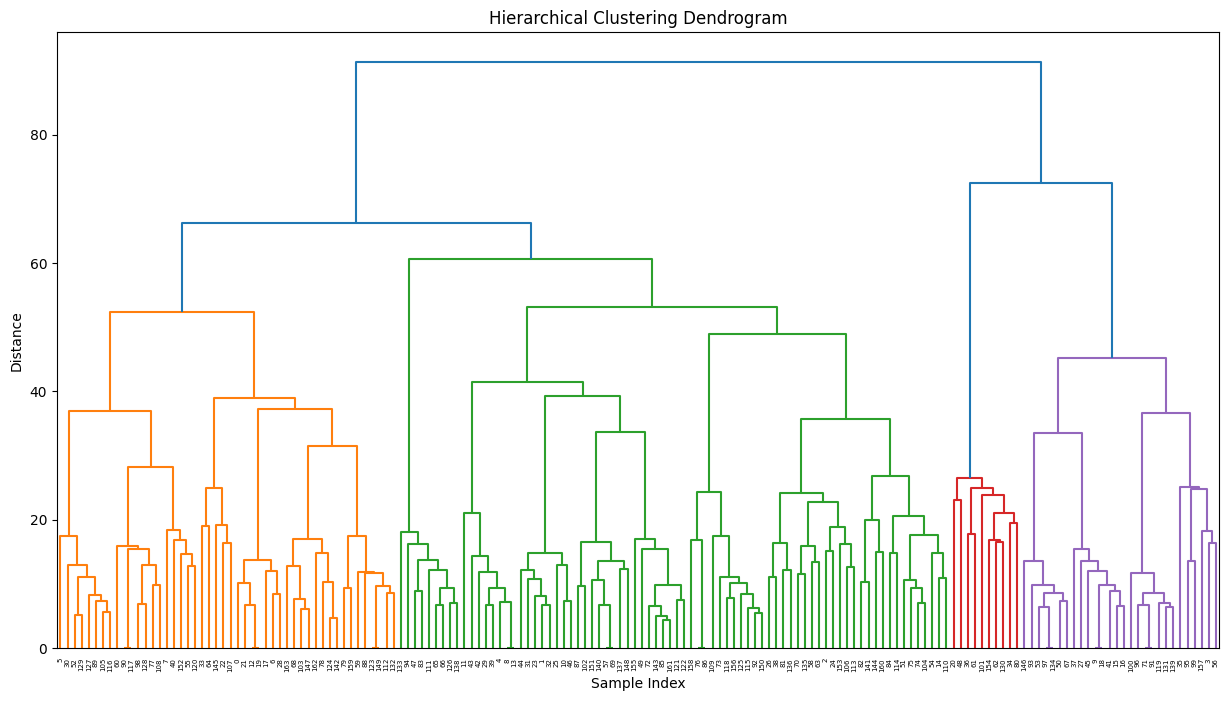

Optimal number of clusters: 162
Clustering results saved in cluster_output folder.


In [ ]:
import os
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import shutil
from sklearn.metrics import silhouette_score

# Path to the directory containing the saved features
output_dir = "/content/drive/MyDrive/features"

# This list holds all the feature filenames
feature_files = []

# Creates a ScandirIterator aliased as files
with os.scandir(output_dir) as files:
    # Loops through each file in the directory
    for file in files:
        # Appends only the feature files to the list
        if file.name.endswith('.npy'):
            feature_files.append(file.name)

# List to store features
features_list = []

# Iterate over each feature filename
for filename in feature_files:
    # Load features
    features = np.load(os.path.join(output_dir, filename))
    # Append features
    features_list.append(features)

# Convert list to numpy array
X = np.array(features_list)

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

# Calculate linkage matrix using Ward's method
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Elbow method to determine the optimal number of clusters
distances = Z[:, 2]
differences = np.diff(distances, 2)
num_clusters = differences.argmax() + 2  # Adding 2 because of 0-based indexing

# Alternatively, you can use silhouette score to determine the optimal number of clusters
# silhouette_scores = []
# for n_clusters in range(2, 11):
#     cluster_labels = np.digitize(Z[:, 2], bins=np.arange(Z[:, 2].min(), Z[:, 2].max(), step=(Z[:, 2].max() - Z[:, 2].min()) / n_clusters))
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     silhouette_scores.append(silhouette_avg)
# num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because of 0-based indexing

print("Optimal number of clusters:", num_clusters)

# Perform hierarchical clustering with the determined number of clusters
cluster_labels = np.digitize(Z[:, 2], bins=np.arange(Z[:, 2].min(), Z[:, 2].max(), step=(Z[:, 2].max() - Z[:, 2].min()) / num_clusters))

# Create a directory to store cluster outputs
cluster_output_dir = "/content/drive/MyDrive/cluster_output"
os.makedirs(cluster_output_dir, exist_ok=True)

# Move images to cluster-specific folders
for cluster_label in np.unique(cluster_labels):
    # Create a folder for the current cluster
    cluster_dir = os.path.join(cluster_output_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    # Move images to the cluster folder
    for filename, label in zip(feature_files, cluster_labels):
        if label == cluster_label:
            shutil.copy(os.path.join(output_dir, filename), cluster_dir)

print("Clustering results saved in cluster_output folder.")


In [ ]:
import os
import numpy as np
import shutil
from scipy.cluster.hierarchy import linkage, fcluster
from skimage.metrics import structural_similarity as ssim
from skimage.io import imread

# Path to the directory containing the image files
image_dir = "/content/drive/MyDrive/dataset"

# This list holds all the image filenames
image_files = []

# Creates a ScandirIterator aliased as files
with os.scandir(image_dir) as files:
    # Loops through each file in the directory
    for file in files:
        # Appends only the image files to the list
        if file.name.endswith('.jpg'):
            image_files.append(file.name)

# Path to the directory containing the saved features
output_dir = "/content/drive/MyDrive/features"

# List to store features
features_list = []

# Iterate over each image filename
for filename in image_files:
    # Load image
    img = imread(os.path.join(image_dir, filename))
    # Load corresponding feature file
    feature_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.npy")
    # Load features
    features = np.load(feature_file)
    # Append features
    features_list.append(features)

# Convert list to numpy array
X = np.array(features_list)

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

# Calculate similarity matrix
similarity_matrix = np.zeros((num_samples, num_samples))
for i in range(num_samples):
    for j in range(i + 1, num_samples):
        similarity = ssim(imread(os.path.join(image_dir, image_files[i])),
                          imread(os.path.join(image_dir, image_files[j])))
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

# Perform hierarchical clustering
Z = linkage(similarity_matrix, method='average')

# Set a threshold distance to merge clusters
threshold = 0.8  # Adjust as needed
cluster_labels = fcluster(Z, threshold, criterion='distance')

# Create a directory to store cluster outputs
cluster_output_dir = "/content/drive/MyDrive/cluster_output"
os.makedirs(cluster_output_dir, exist_ok=True)

# Move images to cluster-specific folders
for cluster_label in np.unique(cluster_labels):
    # Create a folder for the current cluster
    cluster_dir = os.path.join(cluster_output_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    # Move images to the cluster folder
    for filename, label in zip(image_files, cluster_labels):
        if label == cluster_label:
            shutil.copy(os.path.join(image_dir, filename), cluster_dir)

print("Clustering results saved in cluster_output folder.")


<ipython-input-52-be5e0bd8c8f4>:57: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(similarity_matrix, method='average')


Clustering results saved in cluster_output folder.


1/1 [==============================] - 0s 238ms/step


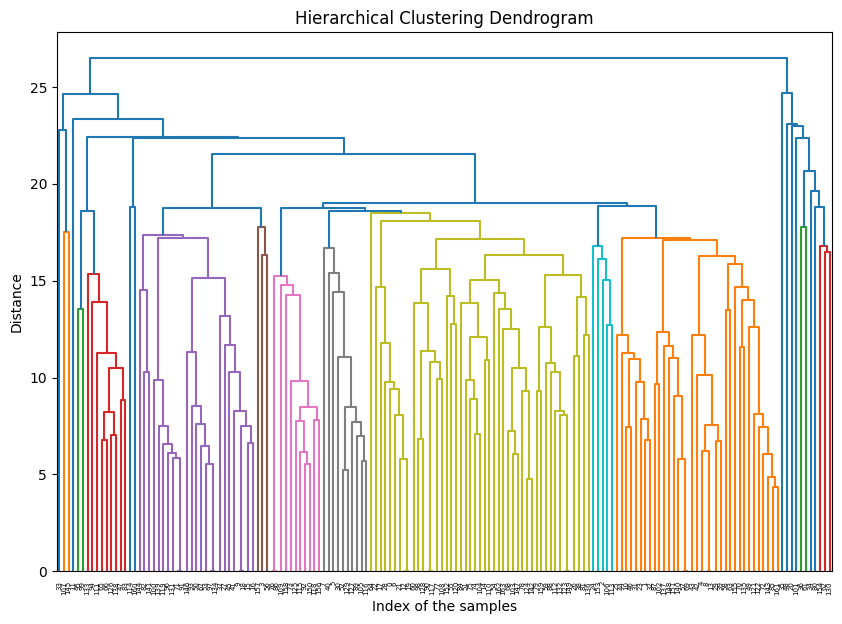

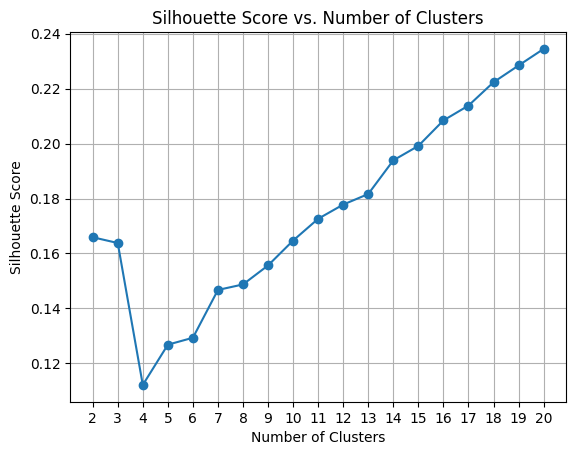

Optimal number of clusters: 20
Silhouette Score for Optimal Clustering: 0.23447007


In [ ]:
features_list = []
image_filenames = []
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_dir, filename)
        features = extract_features(image_path)
        features_list.append(features)
        image_filenames.append(filename)
        np.save(os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.npy"), features)

# Convert features to numpy array
X = np.array(features_list)

# Perform hierarchical clustering
Z = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index of the samples")
plt.ylabel("Distance")
plt.show()

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 21):  # Try different numbers of clusters
    cluster_labels = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different numbers of clusters
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # Add 2 to start from 2 clusters
print("Optimal number of clusters:", optimal_num_clusters)

# Perform clustering with the optimal number of clusters
cluster_labels = AgglomerativeClustering(n_clusters=optimal_num_clusters).fit_predict(X)

# Create directories for cluster outputs
output_cluster_dir = "/content/drive/MyDrive/cluster_output"
os.makedirs(output_cluster_dir, exist_ok=True)

# Move images to cluster-specific folders
for cluster_label, filename in zip(cluster_labels, image_filenames):
    cluster_dir = os.path.join(output_cluster_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    shutil.copy(os.path.join(image_dir, filename), cluster_dir)

# Compute silhouette score for optimal clustering
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score for Optimal Clustering:", silhouette_avg)

In [ ]:
import os
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import shutil

# Path to the directory containing the saved features
output_dir = "/content/drive/MyDrive/features"

# This list holds all the feature filenames
feature_files = []

# Creates a ScandirIterator aliased as files
with os.scandir(output_dir) as files:
    # Loops through each file in the directory
    for file in files:
        # Appends only the feature files to the list
        if file.name.endswith('.npy'):
            feature_files.append(file.name)

# List to store features
features_list = []

# Iterate over each feature filename
for filename in feature_files:
    # Load features
    features = np.load(os.path.join(output_dir, filename))
    # Append features
    features_list.append(features)

# Convert list to numpy array
X = np.array(features_list)

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

# Perform agglomerative clustering without labels
n_clusters = 15  # Adjust as needed
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agglomerative.fit_predict(X)

# Create a directory to store cluster outputs
output_dir_clusters = "/content/drive/MyDrive/cluster_output_agglomerative"
os.makedirs(output_dir_clusters, exist_ok=True)

# Move images to cluster-specific folders
for cluster_label in np.unique(cluster_labels):
    cluster_dir = os.path.join(output_dir_clusters, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    for filename, label in zip(feature_files, cluster_labels):
        if label == cluster_label:
            # Extract original image filename from the feature filename
            image_filename = filename.split('.')[0] + '.jpg'
            # Copy the original image to the cluster directory
            shutil.copy(os.path.join(image_dir, image_filename), cluster_dir)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.199161


In [ ]:
import os
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import shutil

# Path to the directory containing the saved features
output_dir = "/content/drive/MyDrive/features"

# This list holds all the feature filenames
feature_files = []

# Creates a ScandirIterator aliased as files
with os.scandir(output_dir) as files:
    # Loops through each file in the directory
    for file in files:
        # Appends only the feature files to the list
        if file.name.endswith('.npy'):
            feature_files.append(file.name)

# List to store features
features_list = []

# Iterate over each feature filename
for filename in feature_files:
    # Load features
    features = np.load(os.path.join(output_dir, filename))
    # Append features
    features_list.append(features)

# Convert list to numpy array
X = np.array(features_list)

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

# Perform agglomerative clustering without labels
n_clusters = 20 # Adjust as needed
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agglomerative.fit_predict(X)

# Create a directory to store cluster outputs
output_dir_clusters = "/content/drive/MyDrive/cluster_output_agglomerative22"
os.makedirs(output_dir_clusters, exist_ok=True)

# Move images to cluster-specific folders
for cluster_label in np.unique(cluster_labels):
    cluster_dir = os.path.join(output_dir_clusters, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    for filename, label in zip(feature_files, cluster_labels):
        if label == cluster_label:
            # Extract original image filename from the feature filename
            image_filename = filename.split('.')[0] + '.jpg'
            # Copy the original image to the cluster directory
            shutil.copy(os.path.join(image_dir, image_filename), cluster_dir)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.23447007


1/1 [==============================] - 0s 217ms/step


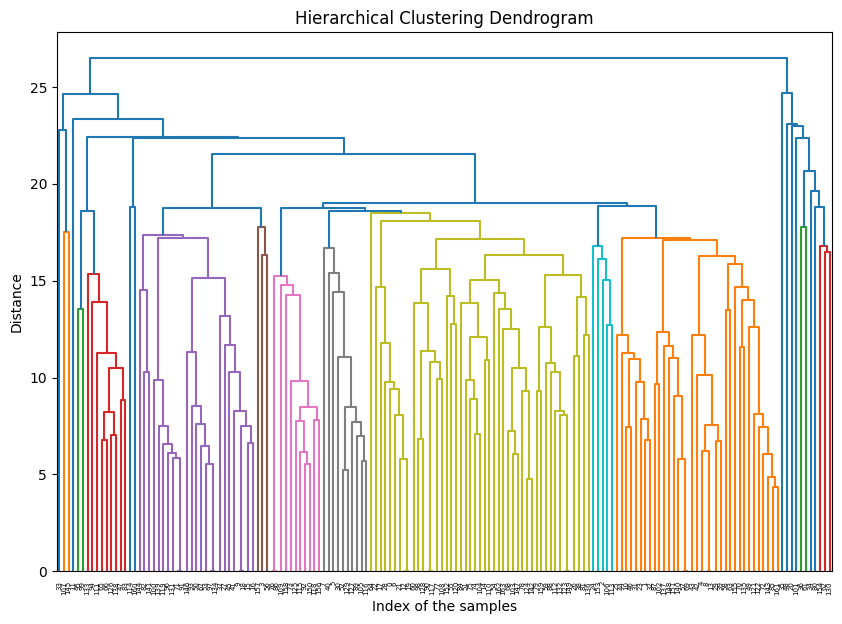

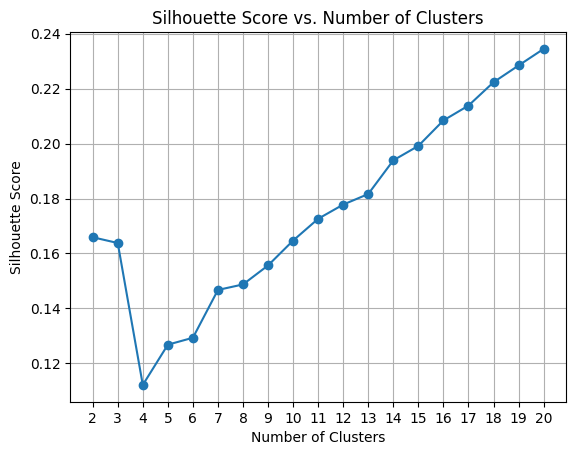

Optimal number of clusters: 20
Silhouette Score for Optimal Clustering: 0.23447007


In [ ]:
import os
import numpy as np
import shutil
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to extract features from an image
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Path to the directory containing the images
image_dir = "/content/drive/MyDrive/dataset"

# Path to the directory where you want to save the features
output_dir = "/content/drive/MyDrive/features"
os.makedirs(output_dir, exist_ok=True)

# Extract features from images and save them
features_list = []
image_filenames = []
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_dir, filename)
        features = extract_features(image_path)
        features_list.append(features)
        image_filenames.append(filename)
        np.save(os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.npy"), features)

# Convert features to numpy array
X = np.array(features_list)

# Perform hierarchical clustering
Z = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index of the samples")
plt.ylabel("Distance")
plt.show()

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 21):  # Try different numbers of clusters
    cluster_labels = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different numbers of clusters
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # Add 2 to start from 2 clusters
print("Optimal number of clusters:", optimal_num_clusters)

# Perform clustering with the optimal number of clusters
cluster_labels = AgglomerativeClustering(n_clusters=optimal_num_clusters).fit_predict(X)

# Create directories for cluster outputs
output_cluster_dir = "/content/drive/MyDrive/cluster_output"
os.makedirs(output_cluster_dir, exist_ok=True)

# Move images to cluster-specific folders
for cluster_label, filename in zip(cluster_labels, image_filenames):
    cluster_dir = os.path.join(output_cluster_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    shutil.copy(os.path.join(image_dir, filename), cluster_dir)

# Compute silhouette score for optimal clustering
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score for Optimal Clustering:", silhouette_avg)


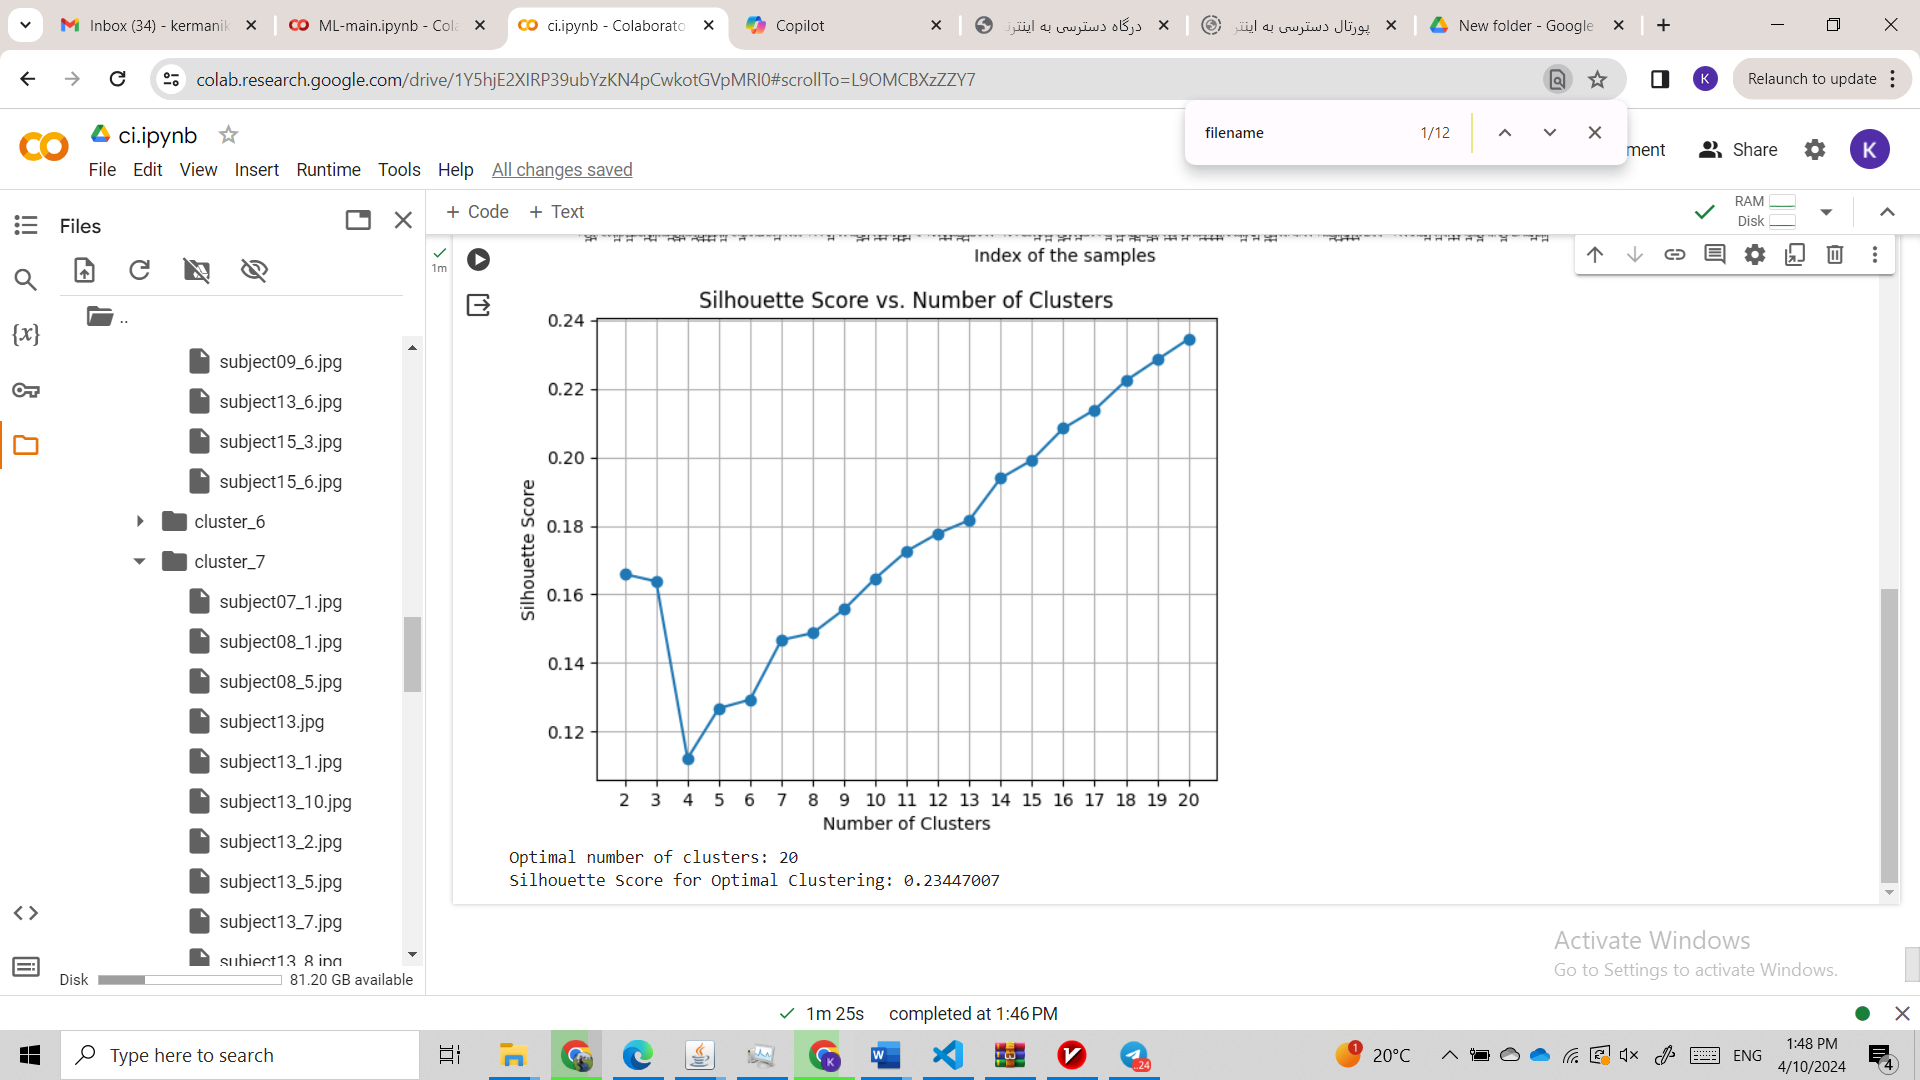